# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

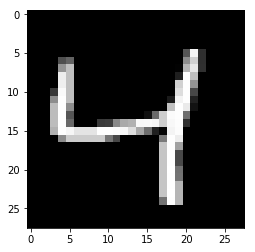

In [8]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 784))
targets_ = tf.placeholder(tf.float32, (None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=32, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=784, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6958
Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6862
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6785
Epoch: 1/20... Training loss: 0.6733
Epoch: 1/20... Training loss: 0.6668
Epoch: 1/20... Training loss: 0.6604
Epoch: 1/20... Training loss: 0.6515
Epoch: 1/20... Training loss: 0.6429
Epoch: 1/20... Training loss: 0.6317
Epoch: 1/20... Training loss: 0.6202
Epoch: 1/20... Training loss: 0.6061
Epoch: 1/20... Training loss: 0.5935
Epoch: 1/20... Training loss: 0.5756
Epoch: 1/20... Training loss: 0.5597
Epoch: 1/20... Training loss: 0.5434
Epoch: 1/20... Training loss: 0.5242
Epoch: 1/20... Training loss: 0.5049
Epoch: 1/20... Training loss: 0.4892
Epoch: 1/20... Training loss: 0.4726
Epoch: 1/20... Training loss: 0.4532
Epoch: 1/20... Training loss: 0.4403
Epoch: 1/20... Training loss: 0.4236
Epoch: 1/20... Training loss: 0.4108
Epoch: 1/20... Training loss: 0.4038
E

Epoch: 1/20... Training loss: 0.2008
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1893
E

Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1625
E

Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1382
E

Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1212
E

Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1114
E

Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1044
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1010
E

Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0927
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0961
E

Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0891
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0869
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

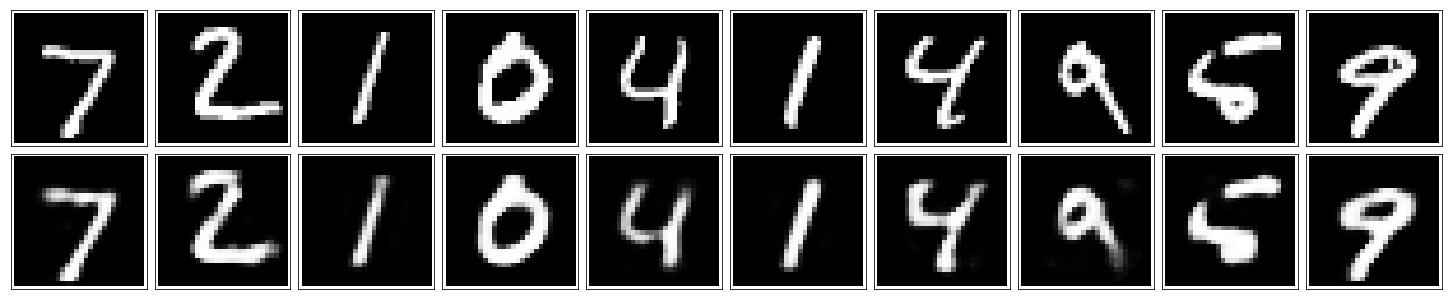

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.